In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [593]:
df_forecast = pd.read_csv('EdStatsData.csv')

In [594]:
# Rename some columns
df_forecast.rename(columns={'Indicator Name' : 'indicator', 'Country Name': 'country'}, inplace = True)

In [595]:
# Delete the last column
df_forecast = df_forecast.iloc[:, :-1]

In [596]:
df_forecast.shape

(886930, 69)

In [597]:
# Drop duplicated columns (here no columns were duplicated)
df_forecast.drop_duplicates(subset=["country", "indicator"], keep='first')
df_forecast.shape

(886930, 69)

In [598]:
# Choose dimensions and years to use for the forecast
df_forecast = df_forecast[['country', 'indicator', "2025", "2030", "2035", "2040"]]

In [599]:
# Regroup all years columns into one
df_forecast = pd.melt(df_forecast, id_vars=['country', 'indicator'], var_name="year", value_name="value")
df_forecast = df_forecast.sort_values(by=['country', 'indicator', 'year']).reset_index(drop=True)
df_forecast.head()

,country,indicator,year,value
0,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN
1,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2030,NaN
2,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2035,NaN
3,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2040,NaN
4,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN


In [600]:
# Divide all values in indicator column to create new columns
df_forecast = df_forecast.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='sum').reset_index()
# Renaming columns for clarity
df_forecast.columns.name = None
df_forecast.head()

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,649.76,1302.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [601]:
# Delete all values in the country column that are not countries
non_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
 ]
df_forecast =  df_forecast[~df_forecast["country"].isin(non_countries)]

In [602]:
# Delete countries with no data

df_forecast_grouped_by_country = df_forecast.groupby(['country']).sum().reset_index()
countries_with_no_data = []

# Iterate over each row in the DataFrame
for index, row in df_forecast_grouped_by_country.iterrows():
    # Check if all indicator columns are 0
    if (row.drop(['country', 'year']) == 0).all():
        countries_with_no_data.append(row['country'])

df_forecast =  df_forecast[~df_forecast["country"].isin(countries_with_no_data)]

In [603]:
# Calculate for each columns the mean of values that equal to 0.
# Sort the result in order to select columns with a rate of 50% or less
zero_proportion = df_forecast.eq(0).mean().sort_values(ascending=True)

zero_proportion[zero_proportion < 0.5].head()

country                                                                                                                               0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Male        0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Female      0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Total    0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Male     0.0
dtype: float64

In [604]:
forecast_dimensions = [
    'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 25-29. Total',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total',

]
dimensions = ['country', 'year'] + forecast_dimensions

In [605]:
df_forecast = df_forecast[dimensions]

In [606]:
df_forecast.rename(columns = {
    'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total':'mean_years_school_15_19',
    'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total':'mean_years_school_20_24',
    'Wittgenstein Projection: Mean years of schooling. Age 25-29. Total':'mean_years_school_25_29',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total':'population_age_20_24_upper_secondary',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total':'population_age_20_124_post_secondary',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Upper Secondary. Total':'population_age_25_29_upper_secondary',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total':'population_age_25_29_post_secondary',
}, inplace = True)


<Axes: >

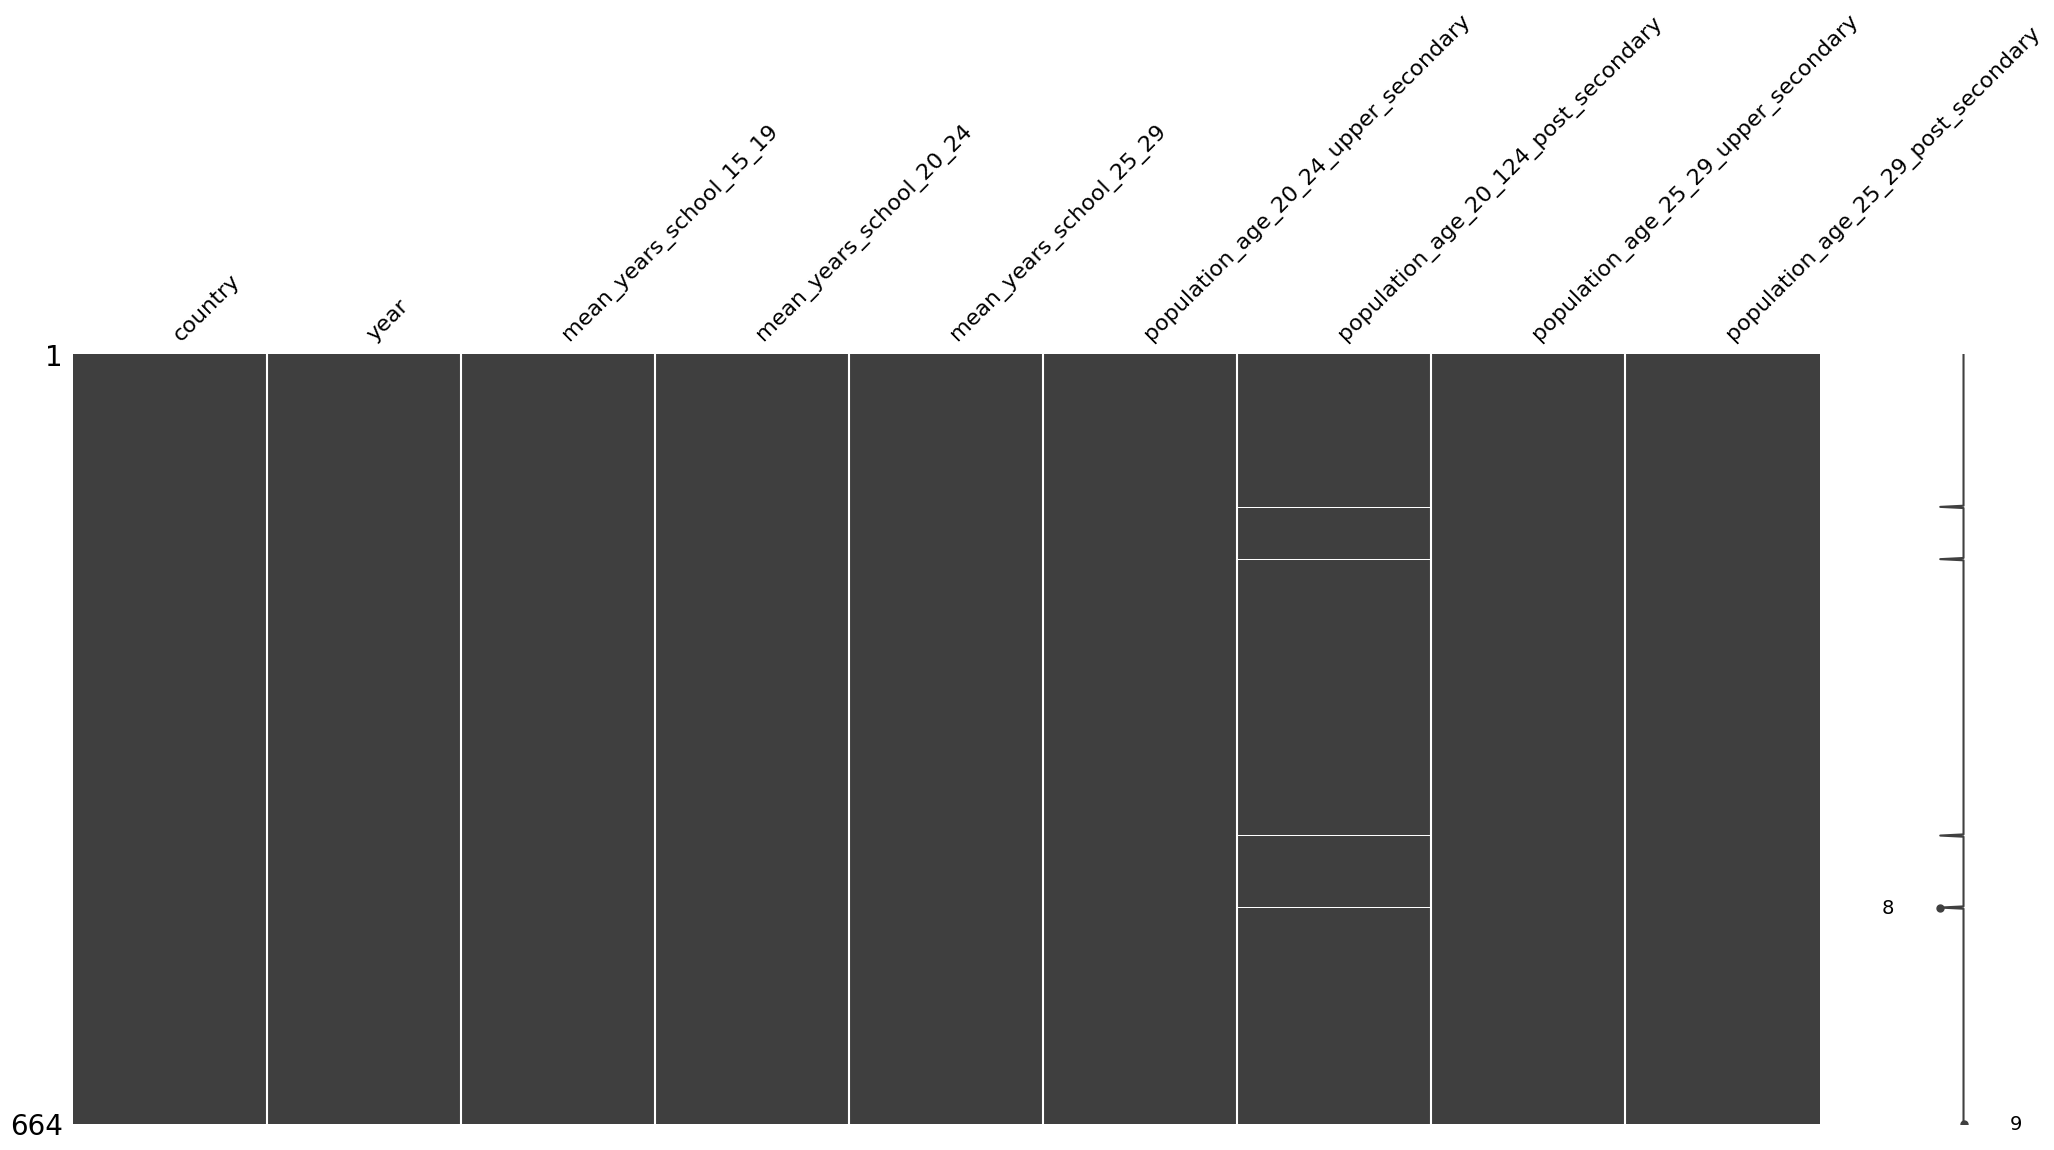

In [607]:
import missingno as msno
import numpy as np
df_forecast.replace(0, np.nan, inplace=True)

%matplotlib inline
msno.matrix(df_forecast.sample(664))

### Analyse univariée

In [608]:
# Get the unique years from the dataframe
unique_years = df_forecast.year.unique()

In [609]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in unique_years:
    stats = df_forecast[df_forecast['year'] == year]["mean_years_school_15_19"].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_15_19,2025,166.0,8.677108,1.891853,3.1,7.6,9.2,9.8,12.6
mean_years_school_15_19,2030,166.0,8.841566,1.802764,3.6,7.9,9.3,9.9,12.8
mean_years_school_15_19,2035,166.0,8.998193,1.713776,4.0,8.2,9.35,10.0,12.9
mean_years_school_15_19,2040,166.0,9.143373,1.636715,4.4,8.5,9.45,10.1,13.0


In [610]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    cv = round(tmp_df['mean_years_school_15_19'].std() / tmp_df['mean_years_school_15_19'].mean() * 100, 4)

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 21.8028
The coeficient of variation for the year 2030 is : 20.3896
The coeficient of variation for the year 2035 is : 19.0458
The coeficient of variation for the year 2040 is : 17.9006


In [611]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    skew = round(tmp_df['mean_years_school_15_19'].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.8638
The skewness for the year 2030 is : -0.8237
The skewness for the year 2035 is : -0.7803
The skewness for the year 2040 is : -0.7236


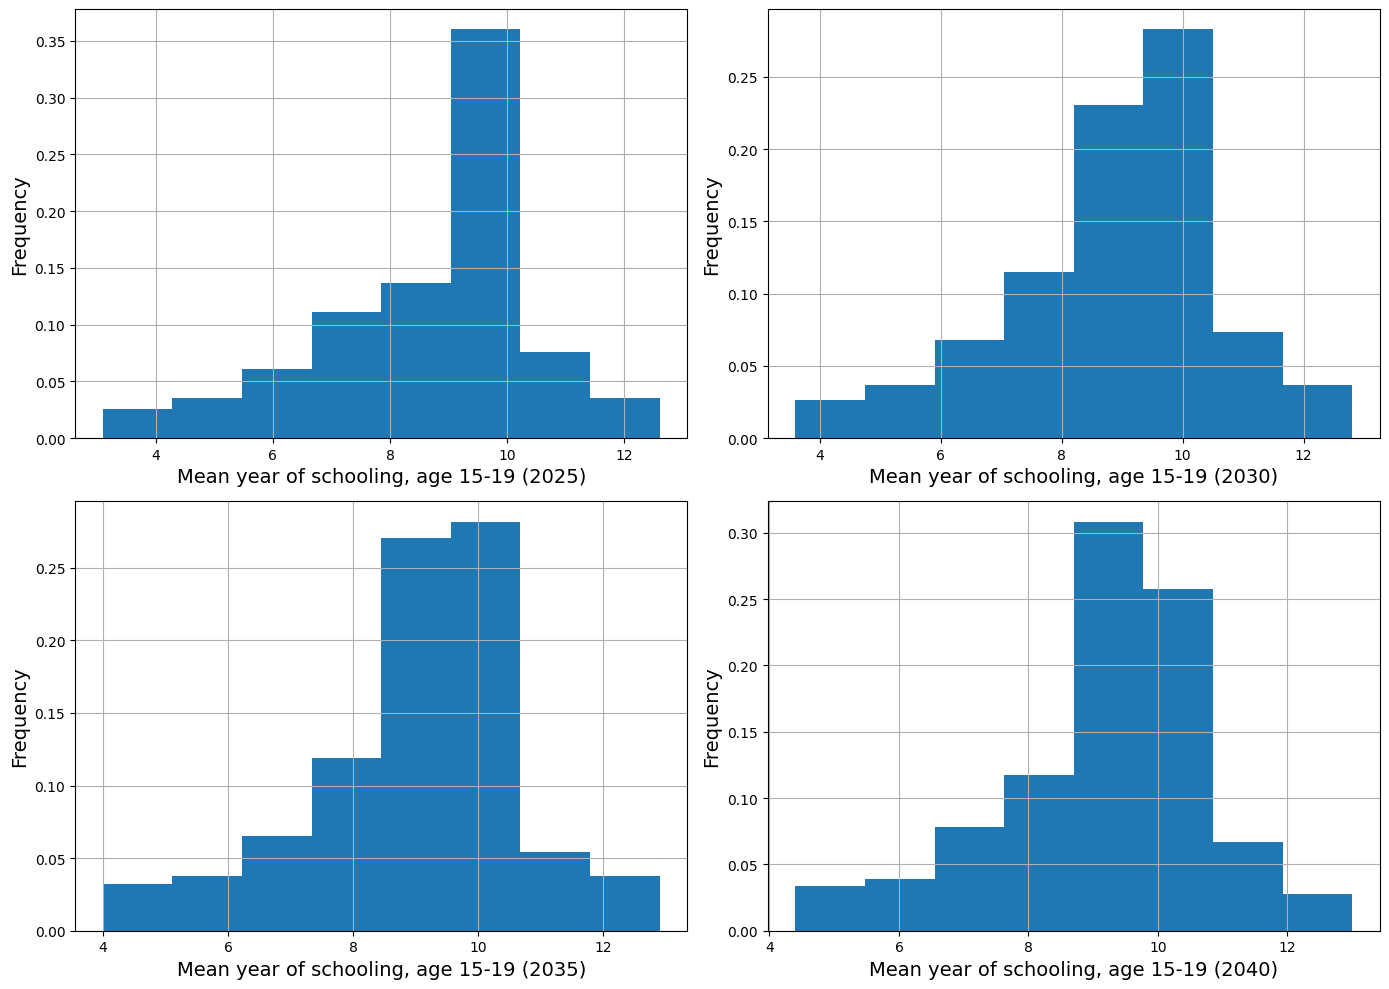

In [612]:
# Create histograms for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_15_19"]
    data.hist(density=True, bins=8, ax=ax)
    ax.set_xlabel(f'Mean year of schooling, age 15-19 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

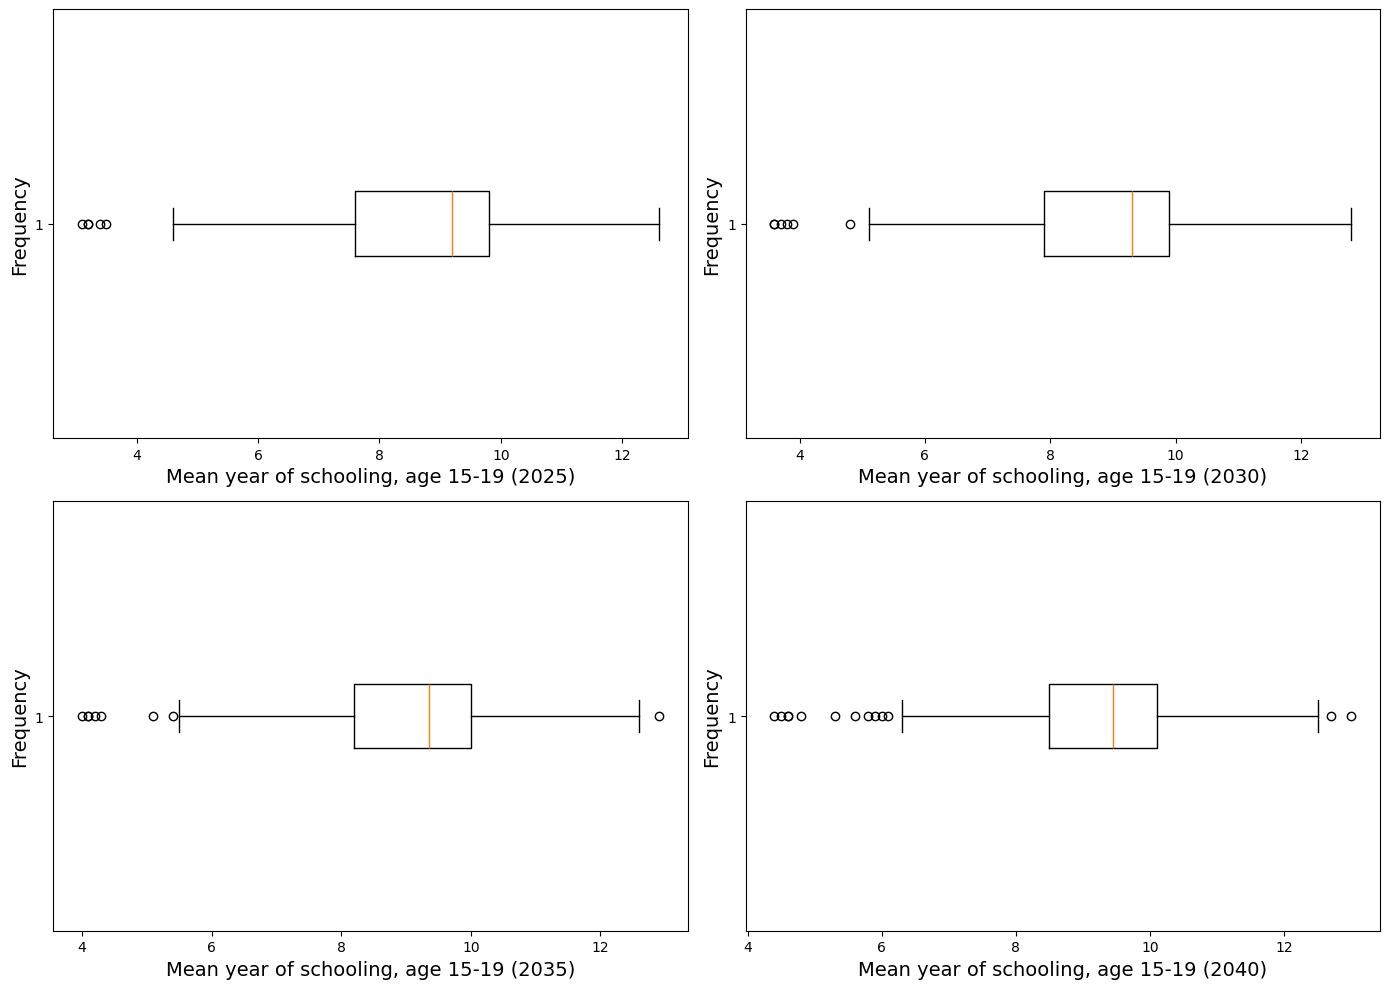

In [613]:
# Create box plot for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_15_19"]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(f'Mean year of schooling, age 15-19 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

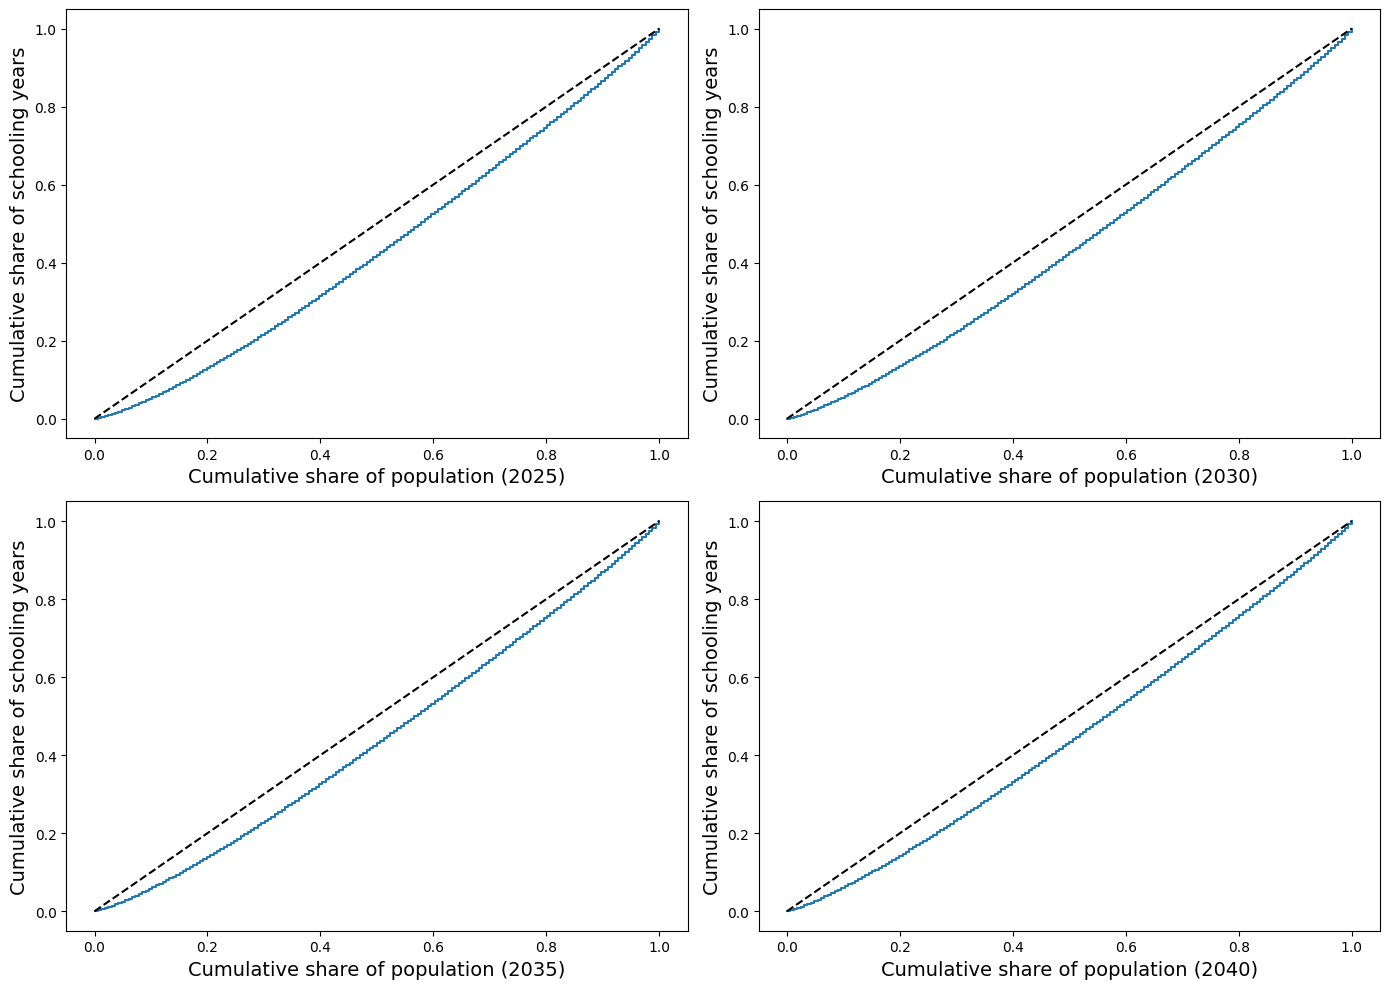

In [637]:
# Create Lorenz curve for oen dimension and for all years

def lorenz_curve(data):
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Compute the cumulative sum
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    # Add (0,0) to the curve
    cumulative_data = np.insert(cumulative_data, 0, 0)
    
    return cumulative_data

# Create subplots for Lorenz curves
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_15_19"]
    
    # Compute Lorenz curve
    lorenz_data = lorenz_curve(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Analyse du nombre moyenne d'année scolaire pour des individus ayant entre 15 et 19 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et il elle se recentre au fil des années.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montrer que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---

In [614]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in unique_years:
    stats = df_forecast[df_forecast['year'] == year]["mean_years_school_20_24"].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_20_24,2025,166.0,10.371084,2.510899,3.1,8.8,11.0,12.2,15.0
mean_years_school_20_24,2030,166.0,10.610241,2.394125,3.5,9.2,11.1,12.4,15.1
mean_years_school_20_24,2035,166.0,10.839157,2.272598,4.0,9.625,11.3,12.5,15.1
mean_years_school_20_24,2040,166.0,11.046988,2.163238,4.5,9.925,11.5,12.675,15.3


In [615]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    cv = round(tmp_df['mean_years_school_20_24'].std() / tmp_df['mean_years_school_20_24'].mean() * 100, 4)

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 24.2106
The coeficient of variation for the year 2030 is : 22.5643
The coeficient of variation for the year 2035 is : 20.9666
The coeficient of variation for the year 2040 is : 19.5821


In [616]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    skew = round(tmp_df['mean_years_school_20_24'].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.8357
The skewness for the year 2030 is : -0.847
The skewness for the year 2035 is : -0.8508
The skewness for the year 2040 is : -0.8316


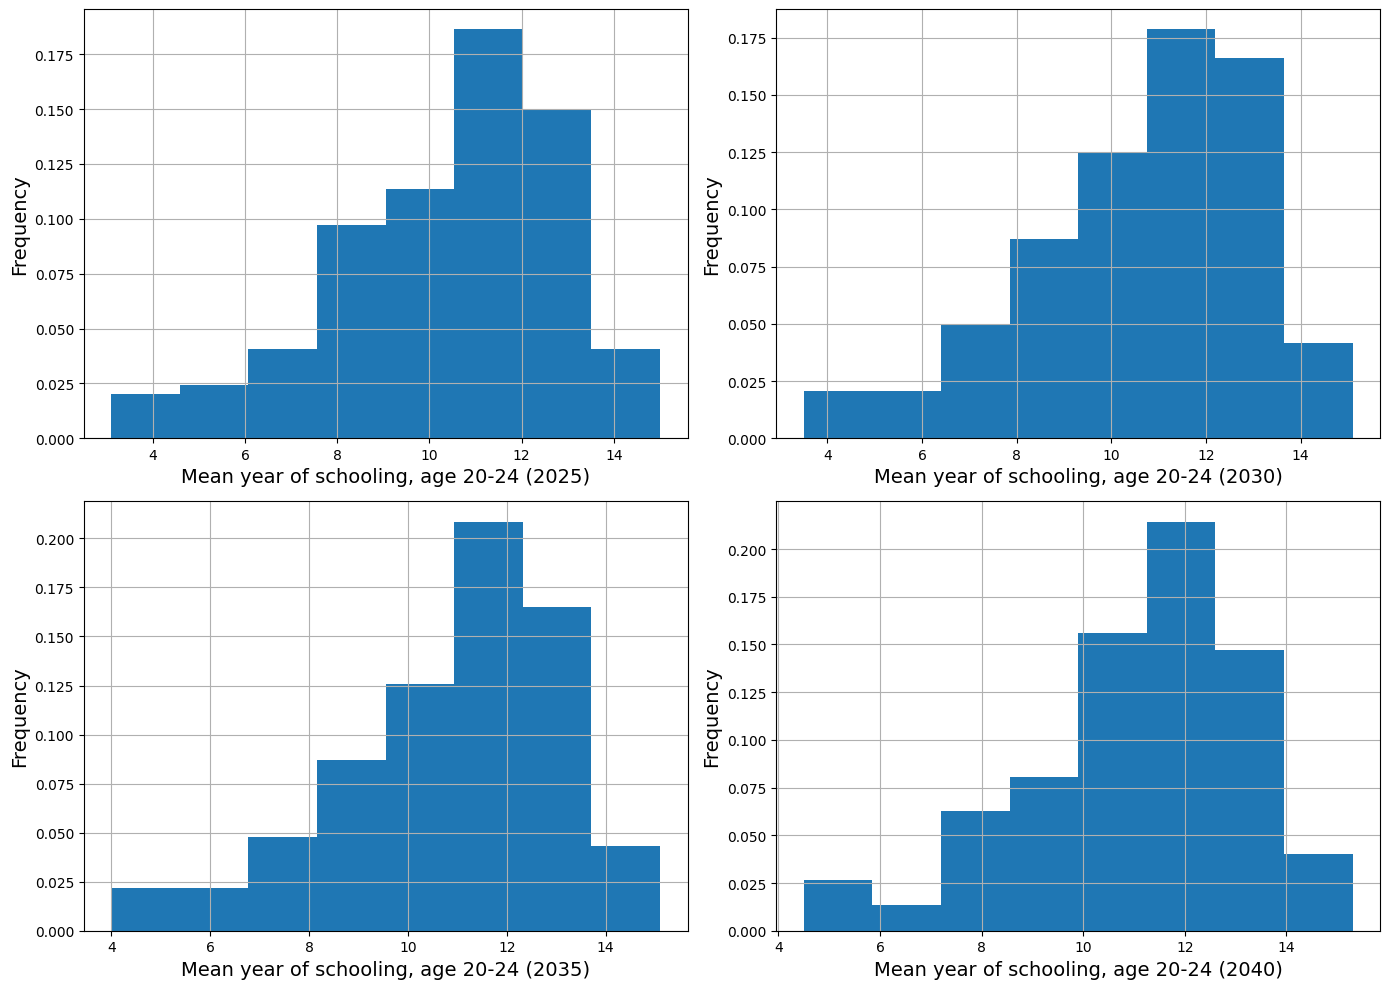

In [617]:
# Create histograms for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_20_24"]
    data.hist(density=True, bins=8, ax=ax)
    ax.set_xlabel(f'Mean year of schooling, age 20-24 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

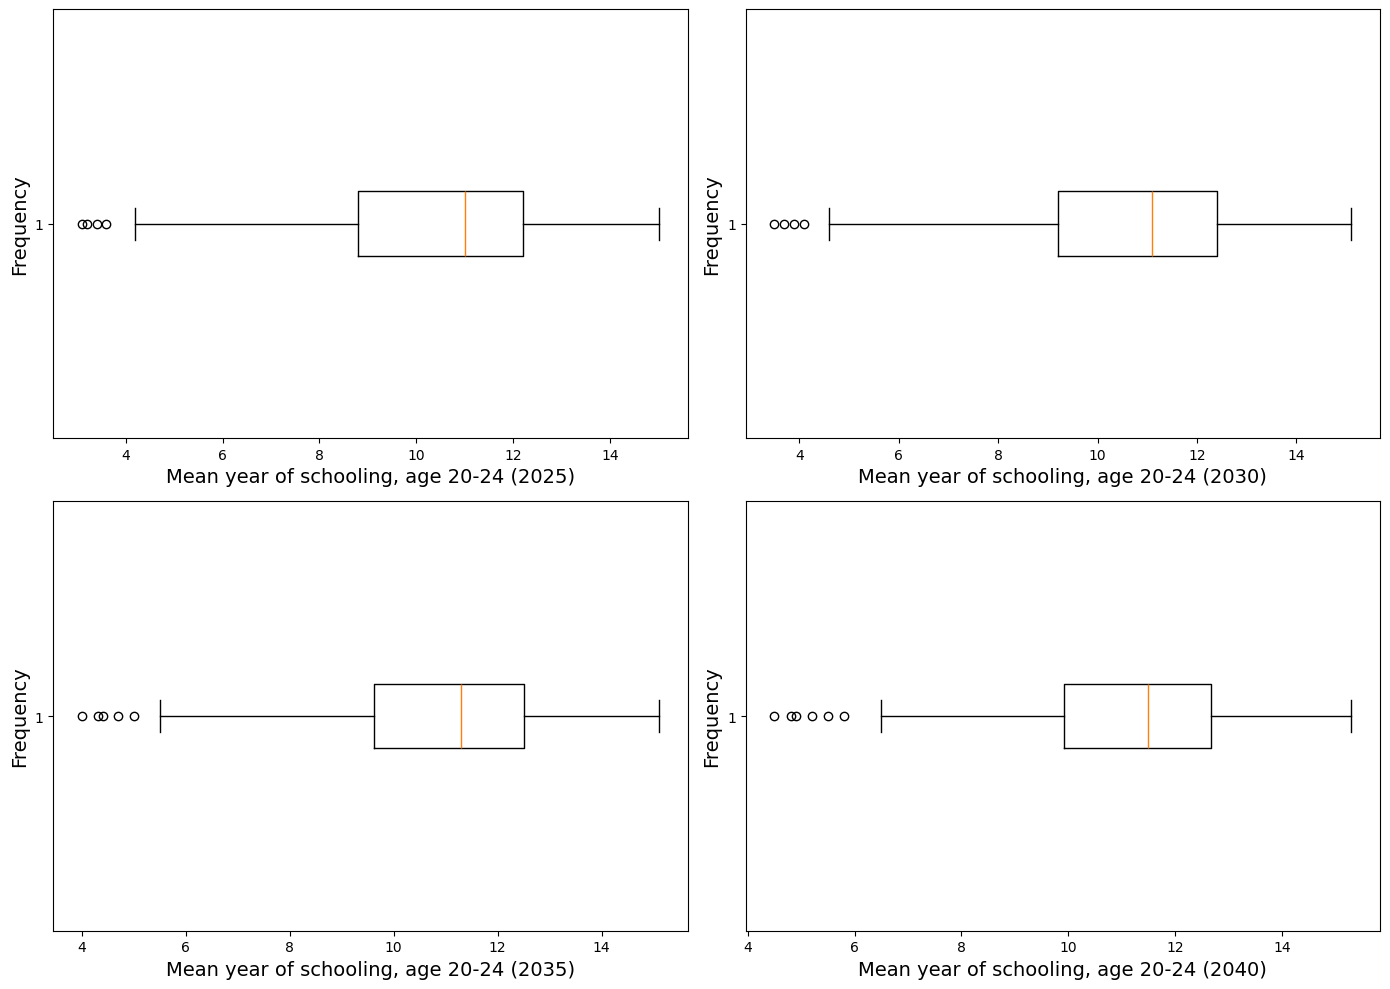

In [618]:
# Create box plot for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_20_24"]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(f'Mean year of schooling, age 20-24 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

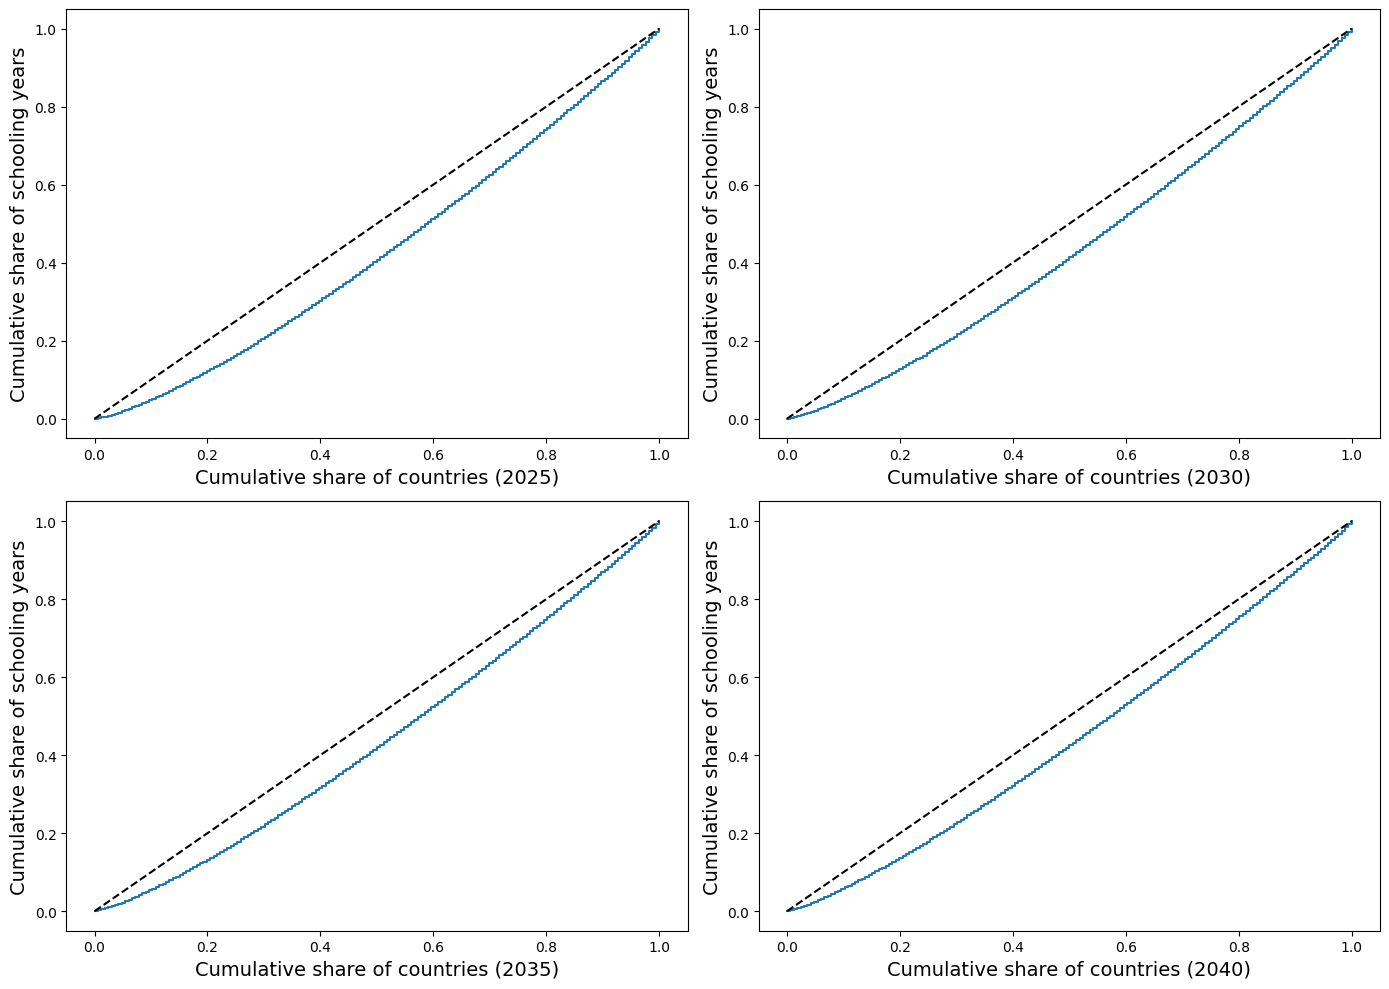

In [638]:
# Create Lorenz curve for oen dimension and for all years

def lorenz_curve(data):
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Compute the cumulative sum
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    # Add (0,0) to the curve
    cumulative_data = np.insert(cumulative_data, 0, 0)
    
    return cumulative_data

# Create subplots for Lorenz curves
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_20_24"]
    
    # Compute Lorenz curve
    lorenz_data = lorenz_curve(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Analyse du nombre moyenne d'année scolaire pour des individus ayant entre 20 et 24 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et elle se décale sur la droite en 2030 et 2035.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montrer que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---

In [619]:
# Create a beautiful DataFrame from describe method

# Create a list to store individual statistics DataFrames
stats_list = []

# Loop over the unique years and compute descriptive statistics for each year
for year in unique_years:
    stats = df_forecast[df_forecast['year'] == year]["mean_years_school_25_29"].describe()
    stats['year'] = year
    stats_list.append(stats)

# Concatenate all the individual DataFrames into one and invert columns and rows
summary_stats = pd.concat(stats_list, axis=1).transpose()

# Rearrange columns so that 'year' is the first column
summary_stats = summary_stats[['year'] + [col for col in summary_stats.columns if col != 'year']]

summary_stats

,year,count,mean,std,min,25%,50%,75%,max
mean_years_school_25_29,2025,166.0,10.713253,2.808872,2.8,8.925,11.2,12.8,15.8
mean_years_school_25_29,2030,166.0,10.998795,2.697541,3.2,9.3,11.4,13.0,15.9
mean_years_school_25_29,2035,166.0,11.272892,2.581458,3.7,9.625,11.6,13.175,16.0
mean_years_school_25_29,2040,166.0,11.529518,2.46383,4.2,10.025,11.95,13.35,16.1


In [620]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    cv = round(tmp_df['mean_years_school_25_29'].std() / tmp_df['mean_years_school_25_29'].mean() * 100, 4)

    print(f"The coeficient of variation for the year {year} is : {cv}")

The coeficient of variation for the year 2025 is : 26.2187
The coeficient of variation for the year 2030 is : 24.5258
The coeficient of variation for the year 2035 is : 22.8997
The coeficient of variation for the year 2040 is : 21.3698


In [621]:
for year in unique_years: 
    tmp_df = df_forecast[df_forecast['year'] == year]
    skew = round(tmp_df['mean_years_school_25_29'].skew(), 4)

    print(f"The skewness for the year {year} is : {skew}")

The skewness for the year 2025 is : -0.7262
The skewness for the year 2030 is : -0.7417
The skewness for the year 2035 is : -0.7452
The skewness for the year 2040 is : -0.7387


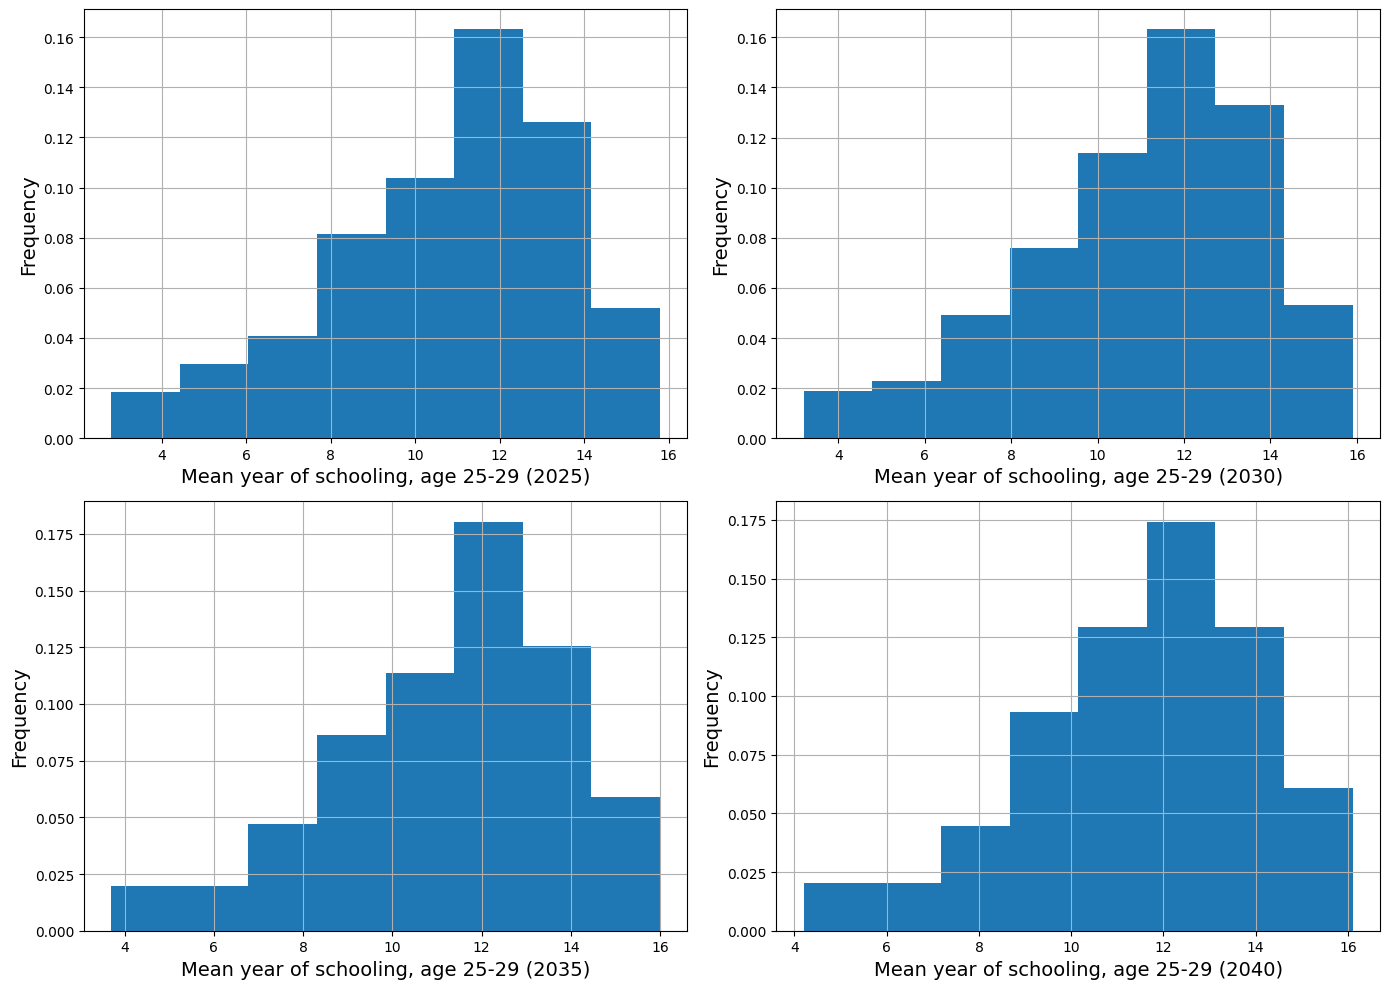

In [622]:
# Create histograms for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_25_29"]
    data.hist(density=True, bins=8, ax=ax)
    ax.set_xlabel(f'Mean year of schooling, age 25-29 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

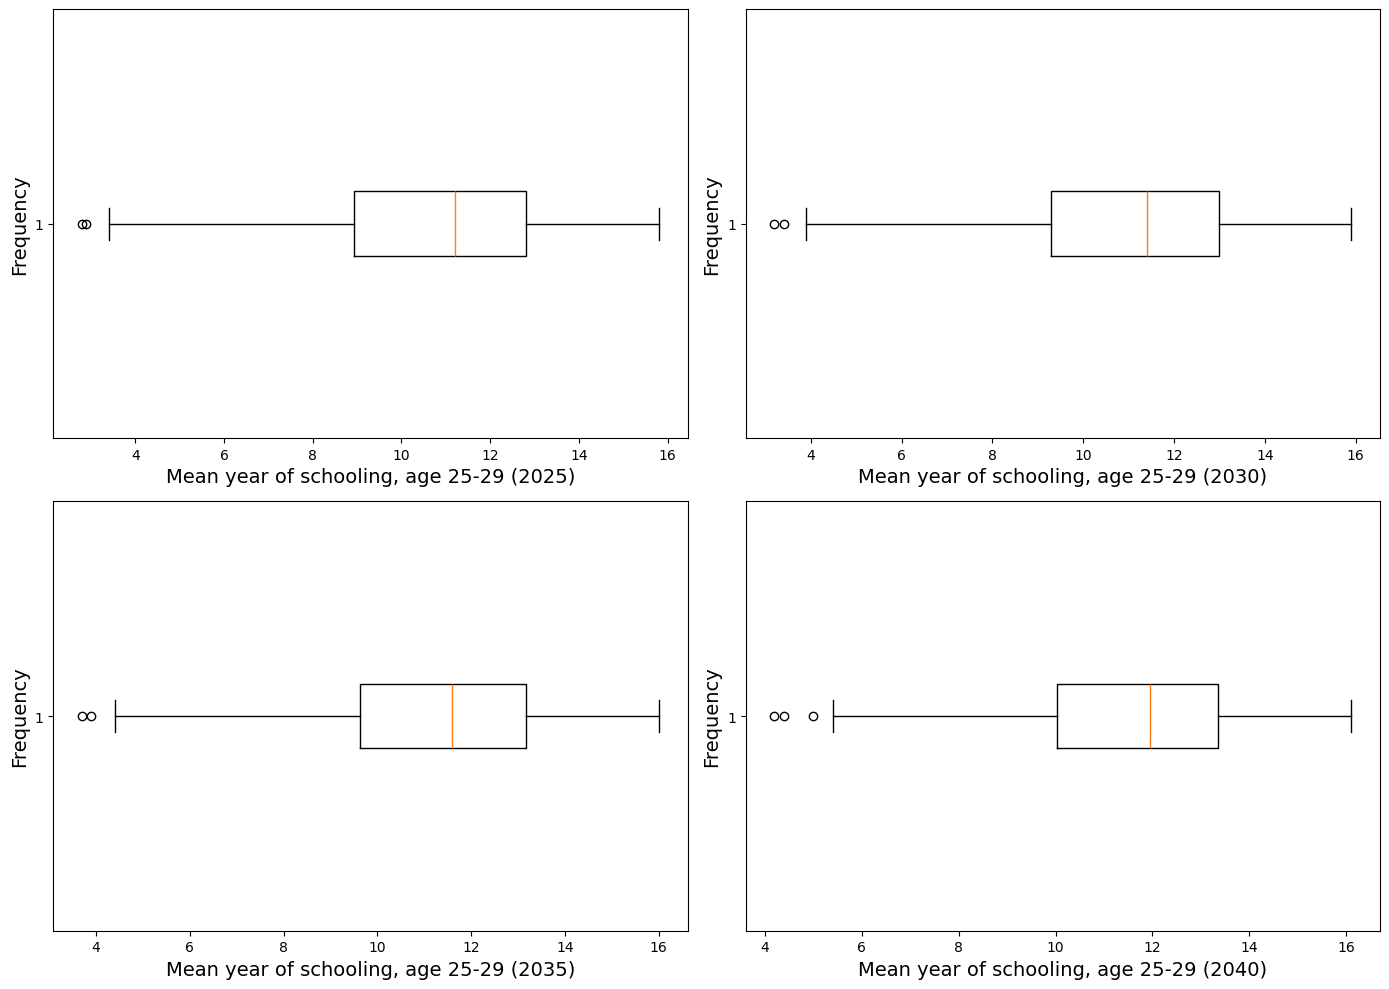

In [623]:
# Create box plot for one dimension and for all years

# Calculate the number of rows needed (2 plots per row)
num_rows = (len(unique_years) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_25_29"]
    ax.boxplot(data, vert=False)
    ax.set_xlabel(f'Mean year of schooling, age 25-29 ({year})', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

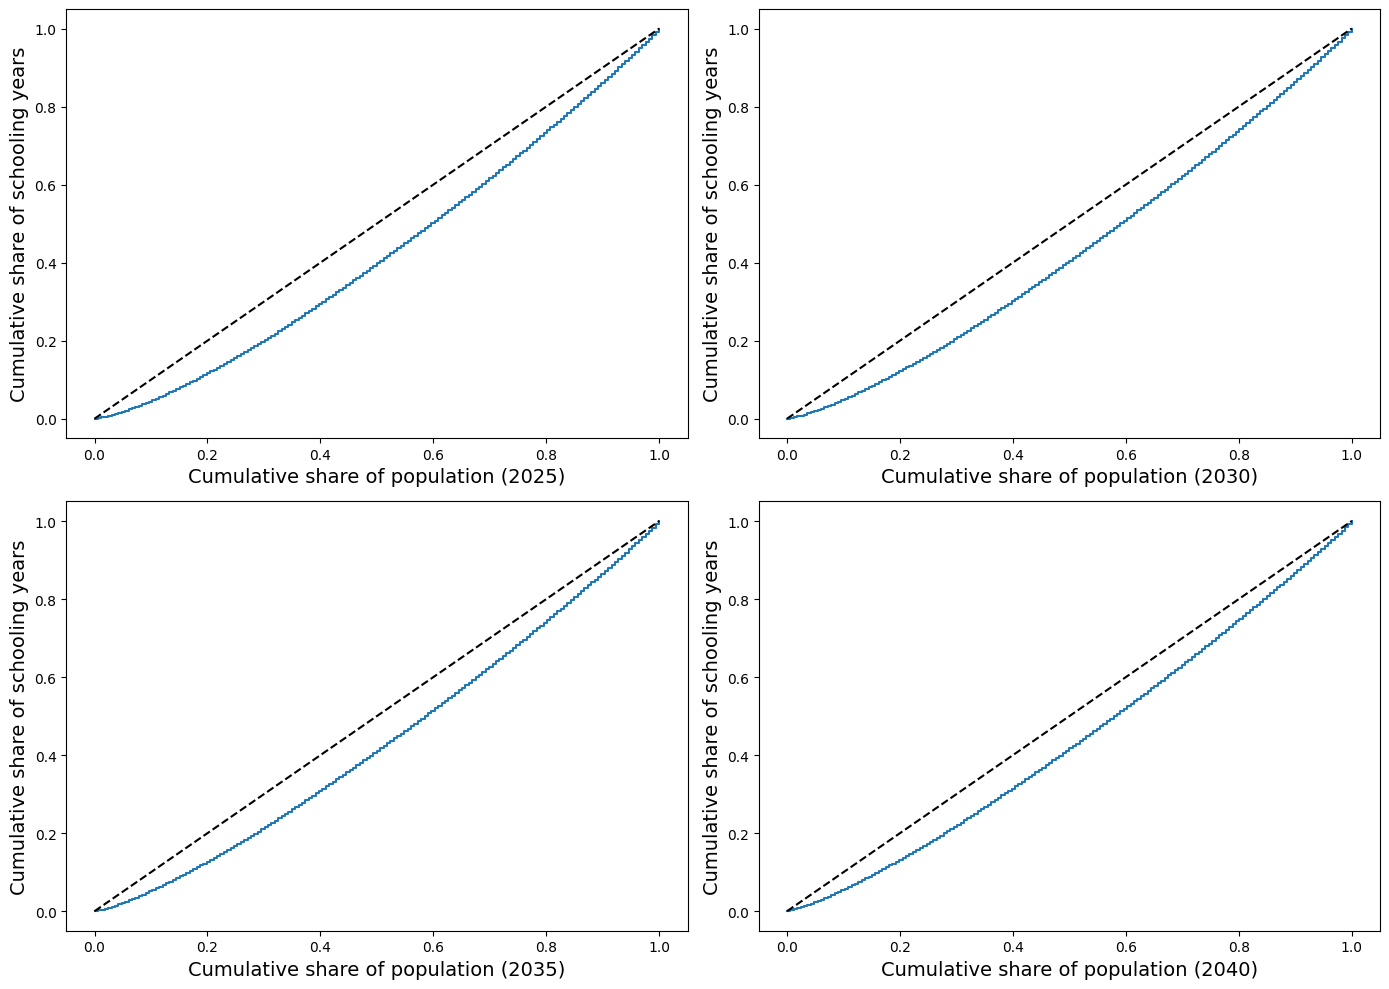

In [636]:
# Create Lorenz curve for oen dimension and for all years

def lorenz_curve(data):
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Compute the cumulative sum
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    # Add (0,0) to the curve
    cumulative_data = np.insert(cumulative_data, 0, 0)
    
    return cumulative_data

# Create subplots for Lorenz curves
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the years and corresponding axes for Lorenz curves
for i, year in enumerate(unique_years):
    ax = axes[i]
    data = df_forecast[df_forecast['year'] == year]["mean_years_school_25_29"]
    
    # Compute Lorenz curve
    lorenz_data = lorenz_curve(data)
    ax.plot(np.linspace(0, 1, len(lorenz_data)), lorenz_data, drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='black', linestyle='--')  # 45-degree line for equality
    
    ax.set_xlabel(f'Cumulative share of countries ({year})', fontsize=14)
    ax.set_ylabel('Cumulative share of schooling years', fontsize=14)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Analyse du nombre moyenne d'année scolaire pour des individus ayant entre 25 et 29 ans
Plus la valeur du coefficient de variation est grande, plus la dispersion autour de la moyenne est grande.

On peut remarquer que ce coefficient diminue à mesure des années.

Cela est due au fait que la moyenne grandie est que l'écart type diminue.

Donc il y a plus d'individus dans la moyenne et ils sont moins dispersés.

Avec le coefficient de variation, nous pouvons voir que notre distribution est étalé sur la gauche. Et elle se décale sur la droite en 2030 et 2035.

La courbe de Lorenz, qui sert à montrer l'égalité entre les individus (ici les pays), nous montrer que les inégalités diminuent car l'aire entre la courbe et la droite diminue.

---